In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [3]:
# Set our tracking server uri for logging
#mlflow_uri ="http://127.0.0.1:8080"
#mlflow.set_experiment(mlflow_uri)

# # Create a new MLflow Experiment
experiment_id = mlflow.create_experiment("v2_logging_api")
print("experiment_id : ",experiment_id)
mlflow.set_experiment(experiment_id)


MlflowException: Experiment 'v2_logging_api' already exists in deleted state. You can restore the experiment, or permanently delete the experiment from the .trash folder (under tracking server's root folder) in order to use this experiment name again.

### MLflow AutoLog testing

In [4]:
mlflow.sklearn.autolog()

with mlflow.start_run():
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

    predictions = rf.predict(X_test)
    print("predictions : ", predictions.shape)

predictions :  (360,)


##  Custom parameters and artifacts store

2024/09/19 21:13:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


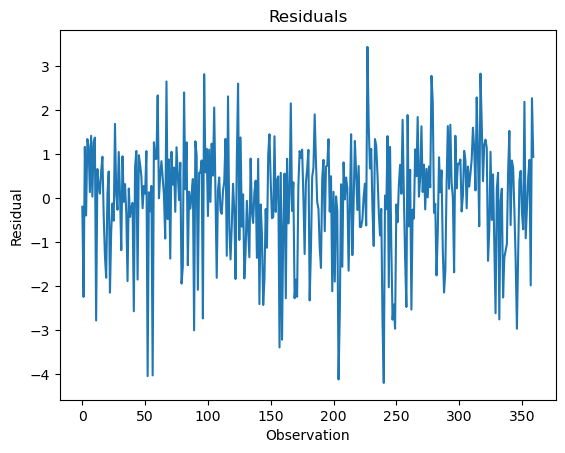

In [5]:
with mlflow.start_run():
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

    mlflow.log_param("num_trees", n_estimators)
    mlflow.log_param("maxdepath", max_depth)
    mlflow.log_param("max_feat", max_features)

    # Define metric to use evaluate model
    mse = mean_squared_error(y_test, predictions)
    mlflow.log_metric("mse", mse)

    #Log the mode created by this run
    mlflow.sklearn.log_model(rf,"random_forest_model")
    
    savetxt("predictions.csv", predictions, delimiter=",")
    #Log the saved table as an artifacts

    mlflow.log_artifact("predictions.csv")

    # Convert the loss
    temp_df = pd.DataFrame(data=predictions- y_test)
    plt.plot(temp_df)
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.title("Residuals")

    plt.savefig("residuals_plot.png")
    mlflow.log_artifact("residuals_plot.png")

### Reset the experiment and Run

In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import matplotlib.pyplot as plt
from numpy import savetxt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
db = load_digits()
X = db.data
y = db.target
print("Shape X : ",X.shape)
print("Shape y : ",y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X :  (1797, 64)
Shape y :  (1797,)


In [5]:
experiment_name = "v2_logging_api"

In [6]:
experiment = mlflow.set_experiment(experiment_name)
with mlflow.start_run():
    n_estimators = 110
    max_depth = 10
    max_features = 3

    rf =  RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,max_features=max_features)
    rf.fit(X_train,y_train)

# Experiment Details
print("EXperiment id: {}".format(experiment.experiment_id))
print("Artifcats Location: {}".format(experiment.artifact_location)) 
print("Tags : {}".format(experiment.tags))
print("lifecycle_stage : {}".format(experiment.lifecycle_stage))

EXperiment id: 865495060364082920
Artifcats Location: file:///Users/tharhtet/Documents/github/ML-in-Prod-batch-1/8_Experiment_Tracking/mlruns/865495060364082920
Tags : {}
lifecycle_stage : active
